In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os
import glob
import random

### Load images from folders

In [5]:
def get_images_from_folder(folder):
    data = ('../raw_data') 
    for root, dirs, files in os.walk(data):
        for d in dirs:
            if d == folder:
                directory = (root+'/'+d+'/img/')           

    files = os.listdir(directory)
    return [file for file in files]

falciparum = get_images_from_folder('Falciparum')
malariae = get_images_from_folder('Malariae') 
ovale = get_images_from_folder('Ovale' ) 
vivax = get_images_from_folder('Vivax') 

print (f'falciparum : {len(falciparum)}\nmalariae : {len(malariae)}\novale : {len(ovale)}\nvivax : {len(vivax)}')

falciparum : 104
malariae : 37
ovale : 29
vivax : 40


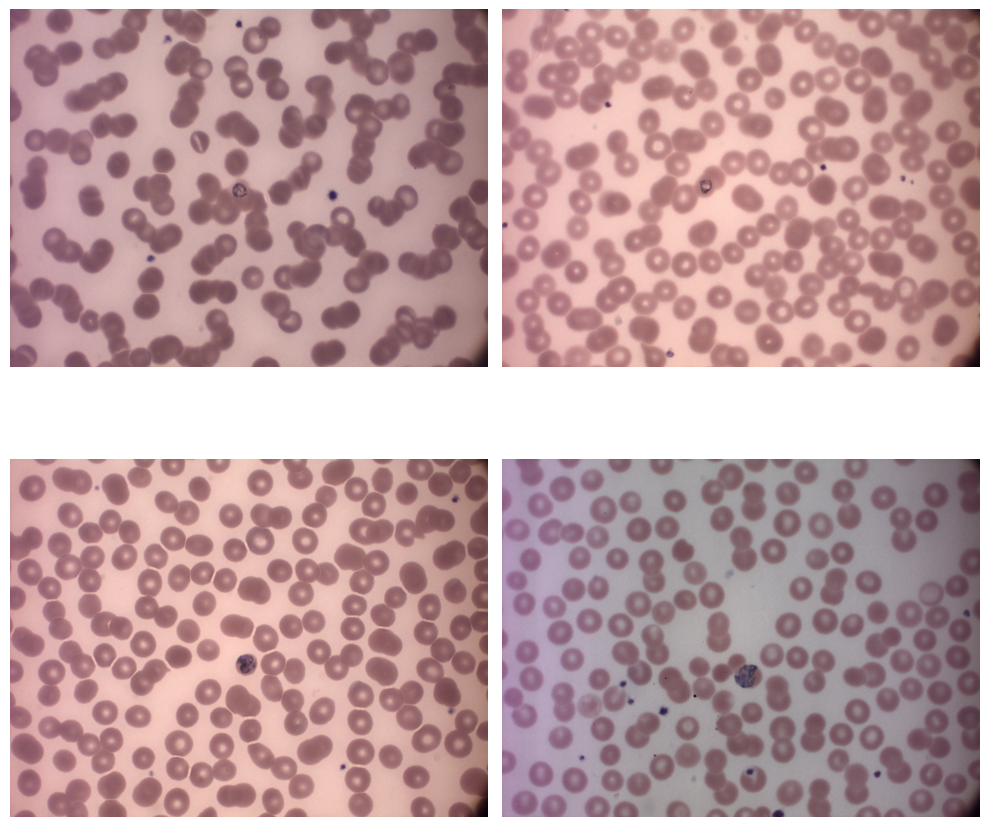

In [6]:
def display_image(folder_name, nr=2):
    folder = folder_name.capitalize()
    img_list = get_images_from_folder(folder)
    random_images = random.sample(img_list, k=min(nr, len(img_list)))

    num_rows = (len(random_images) + 1) // 2
    num_cols = min(2, len(random_images))

    if num_rows == 0 or num_cols == 0:
        return  # No images to display

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5*num_rows))

    if num_rows == 1:
        axes = np.array([axes])  # Convert to NumPy array
        axes = axes.reshape(1, num_cols)

    for i, r in enumerate(random_images):
        dir_path = "../raw_data/" + folder + "/img/"
        absolute_path = os.path.abspath(dir_path)
        image_file = glob.glob(os.path.join(absolute_path, r))
        image = plt.imread("".join(image_file))

        ax = axes[i // num_cols, i % num_cols]
        ax.imshow(image)
        ax.axis("off")

    plt.tight_layout()
    plt.show()
    
display_image('Malariae',4)

### Species Categories

In [7]:
def get_letter_combinations(text):
    if '0021_R_T' in text:
        text_group = 'R_T'
    else:
        last_dash = text.rfind('-')
        last_dot = text.rfind('.')
        text_group = text[last_dash +1 : last_dot]
    
    return text_group  

In [8]:
def create_df():
    combo = [falciparum, malariae, ovale, vivax]
    dfs = []
    for species in combo:
        counts = {}
        for t in species:
            letter = get_letter_combinations(t)

            if letter in counts:
                counts[letter] += 1
            else:
                counts[letter] = 1
        dfs.append(counts)

    keys = ['falciparum', 'malariae', 'ovale', 'vivax']
    df = pd.DataFrame.from_records(dfs, index=keys) #df from list of dicts
    df = df.replace([np.inf, -np.inf, np.nan], 0) #replace inf and nan with 0
    df = df.astype(int) #convert to int
    df = df.transpose() 
    return df

df=create_df()
df

,falciparum,malariae,ovale,vivax
T,8,19,9,3
S,10,9,1,9
R,68,0,8,19
R_T,12,1,2,2
R_S,3,0,0,0
R_T_S,1,0,0,0
T_R,1,0,1,0
S_R,1,0,0,1
G,0,7,6,3
S_T,0,1,0,0


### Plotting

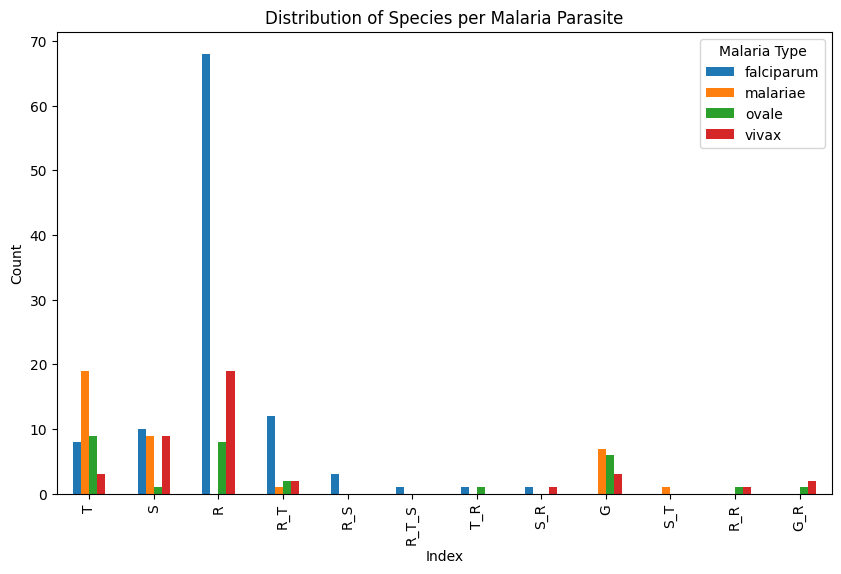

In [9]:
df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Index')
plt.ylabel('Count')
plt.title('Distribution of Species per Malaria Parasite')
plt.legend(title='Malaria Type')
plt.show()

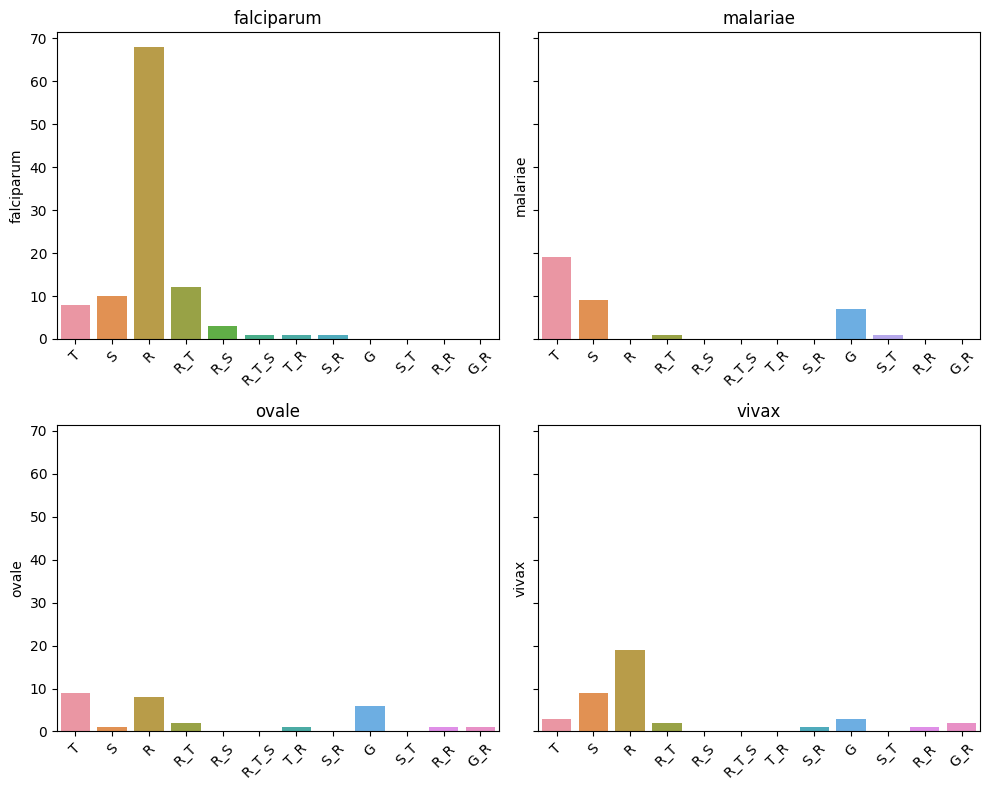

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharey=True)
axes = axes.flatten()

for i, col in enumerate(['falciparum', 'malariae', 'ovale', 'vivax']):
    sns.barplot(data=df, x=df.index, y=col, ax=axes[i])

    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()